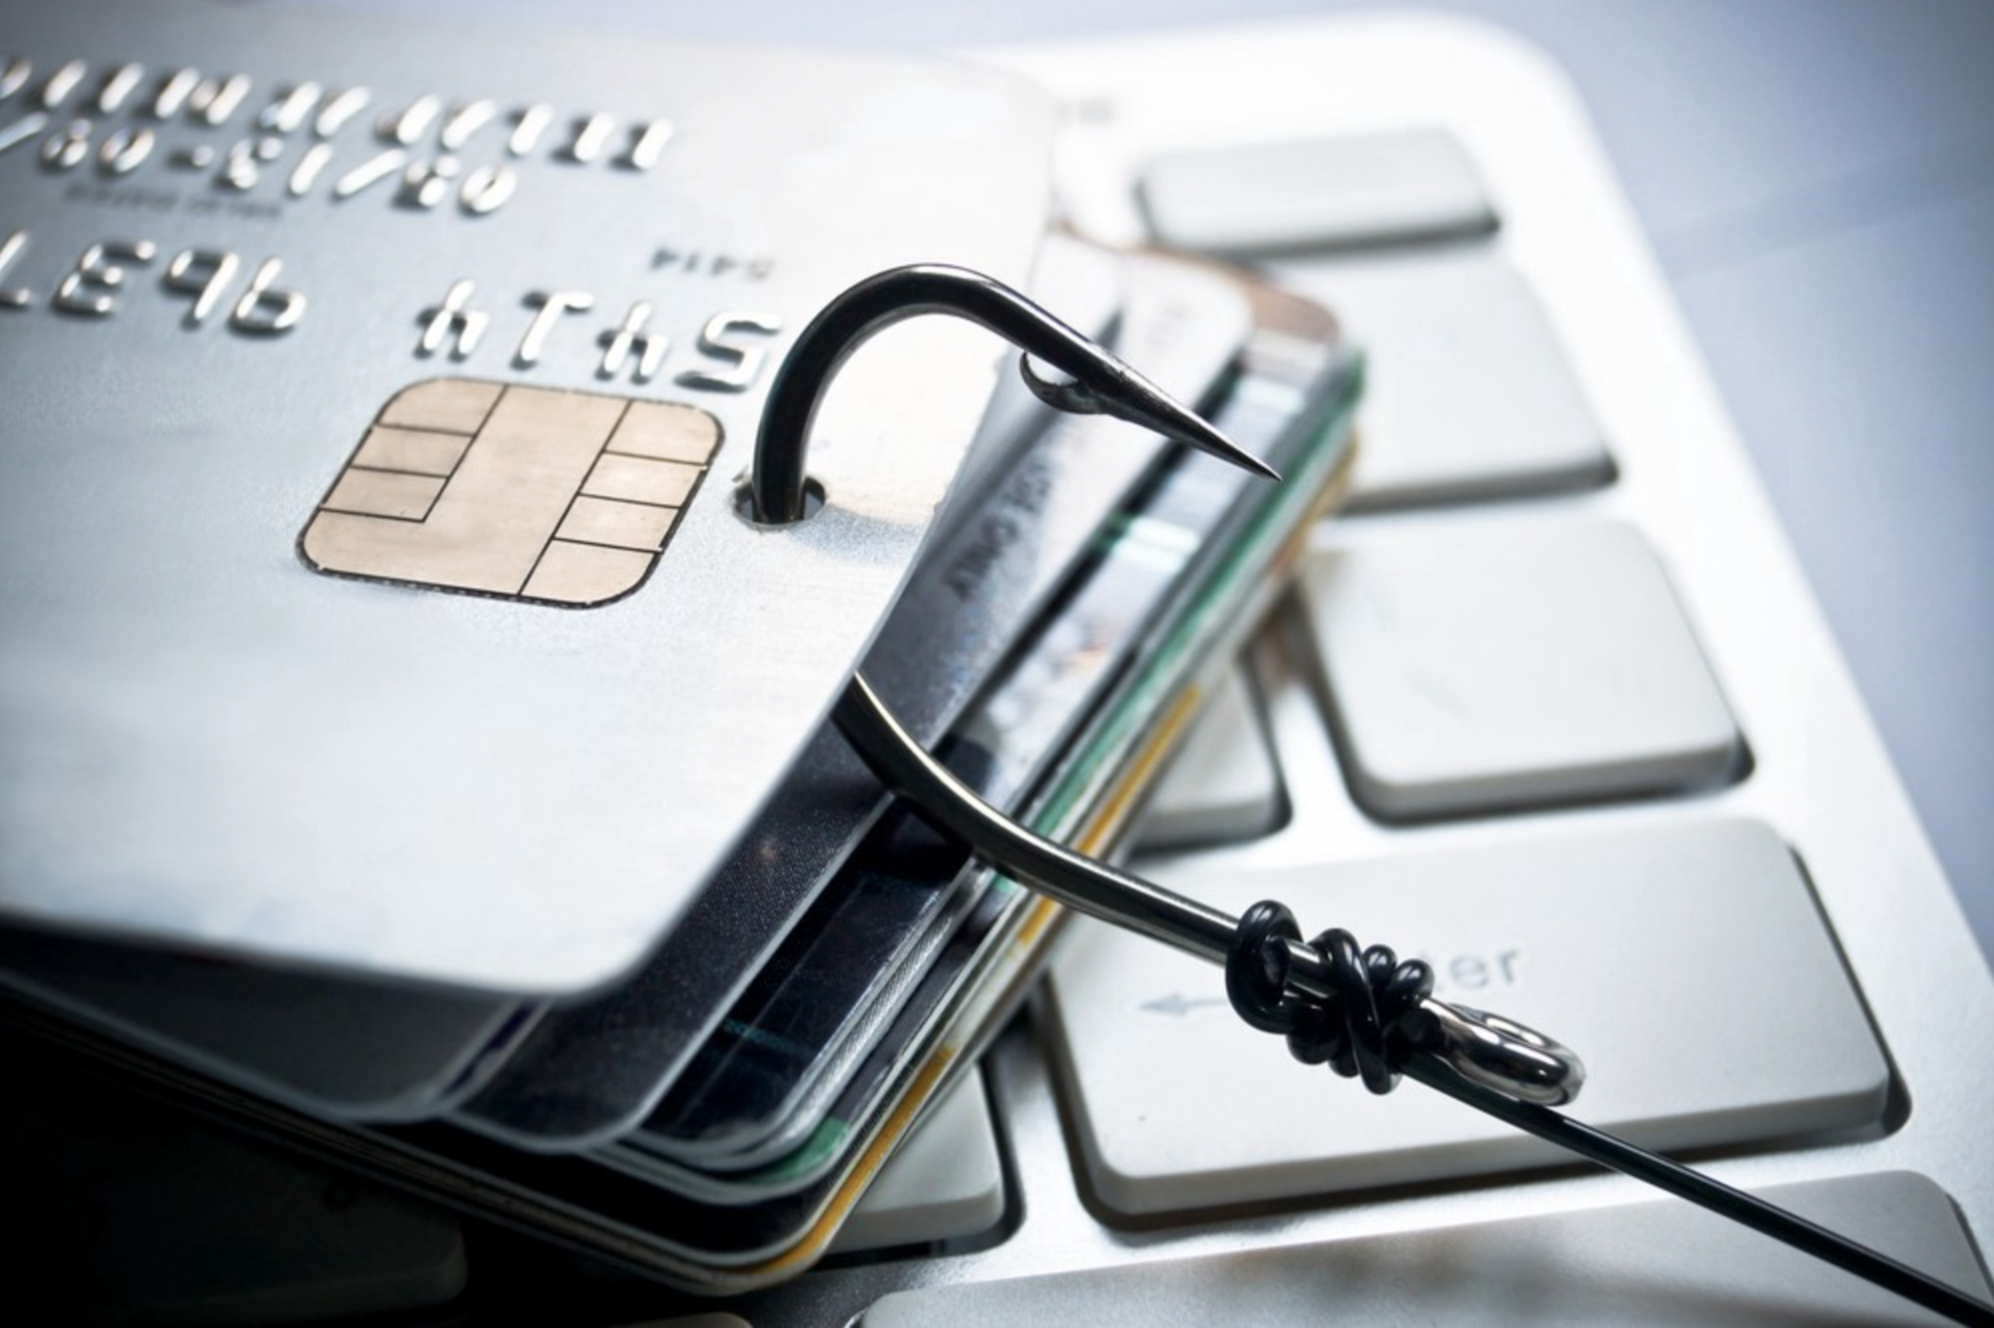

<h1><center>Credit Card Fraud Detection</center></h1>

## Problem Statement

The Credit Card Fraud Detection Problem includes modeling past credit card transactions with the knowledge of the ones that turned out to be fraud. This model is then used to identify whether a new transaction is fraudulent or not. Our aim here is to detect the fraudulent transactions while minimizing the incorrect fraud classifications.

## Data Description

The dataset contains transactions made by credit cards in September 2013 by European cardholders. This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-sensitive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

## Exploratory data analysis

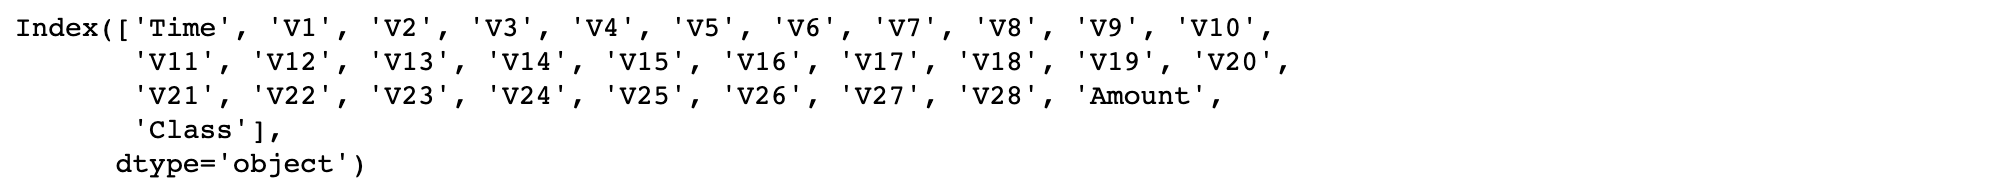

We have 31 columns, 2 of which are Time and Amount. The rest are output from the PCA transformation

### Handling missing values

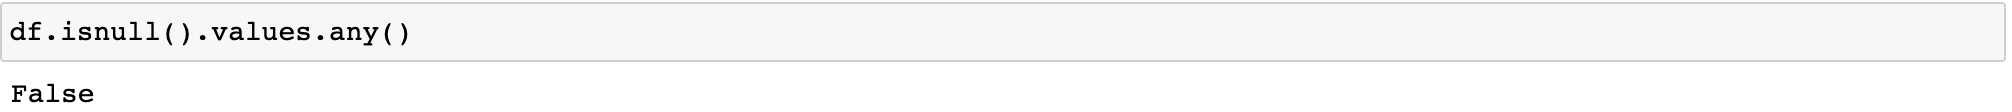

We can see that there is no missing values in any of the columns. Hence, there is no problem with null values in the entire dataset.

### Checking the distribution of the 'Class' column

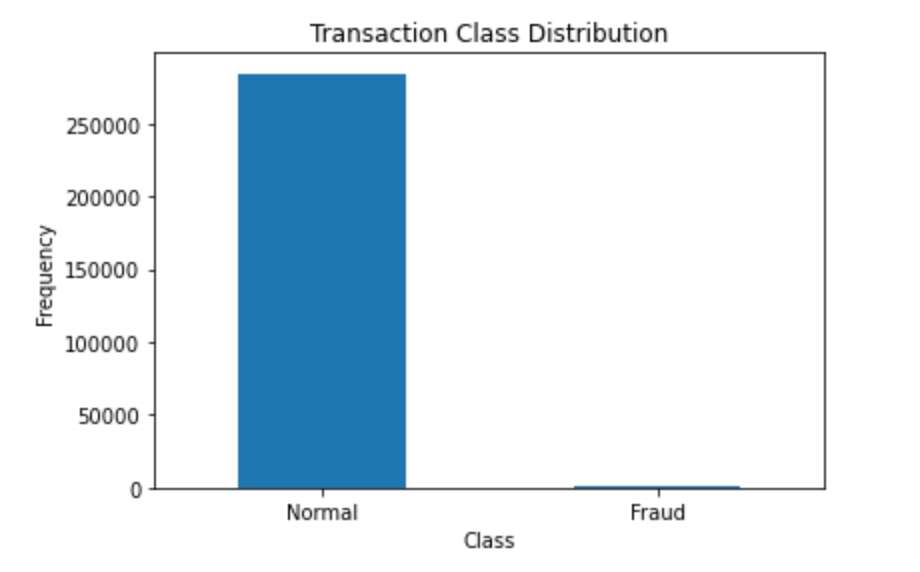

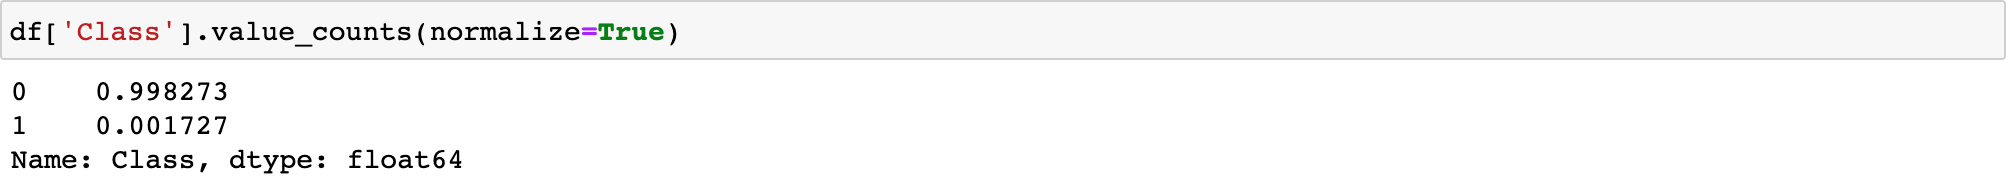

We have a highly imbalanced dataset on our hands(Only 0.17% transactions are fraudulent whereas 99.8% transactions are normal). Normal transactions overwhelm the fraudulent ones by a large margin.

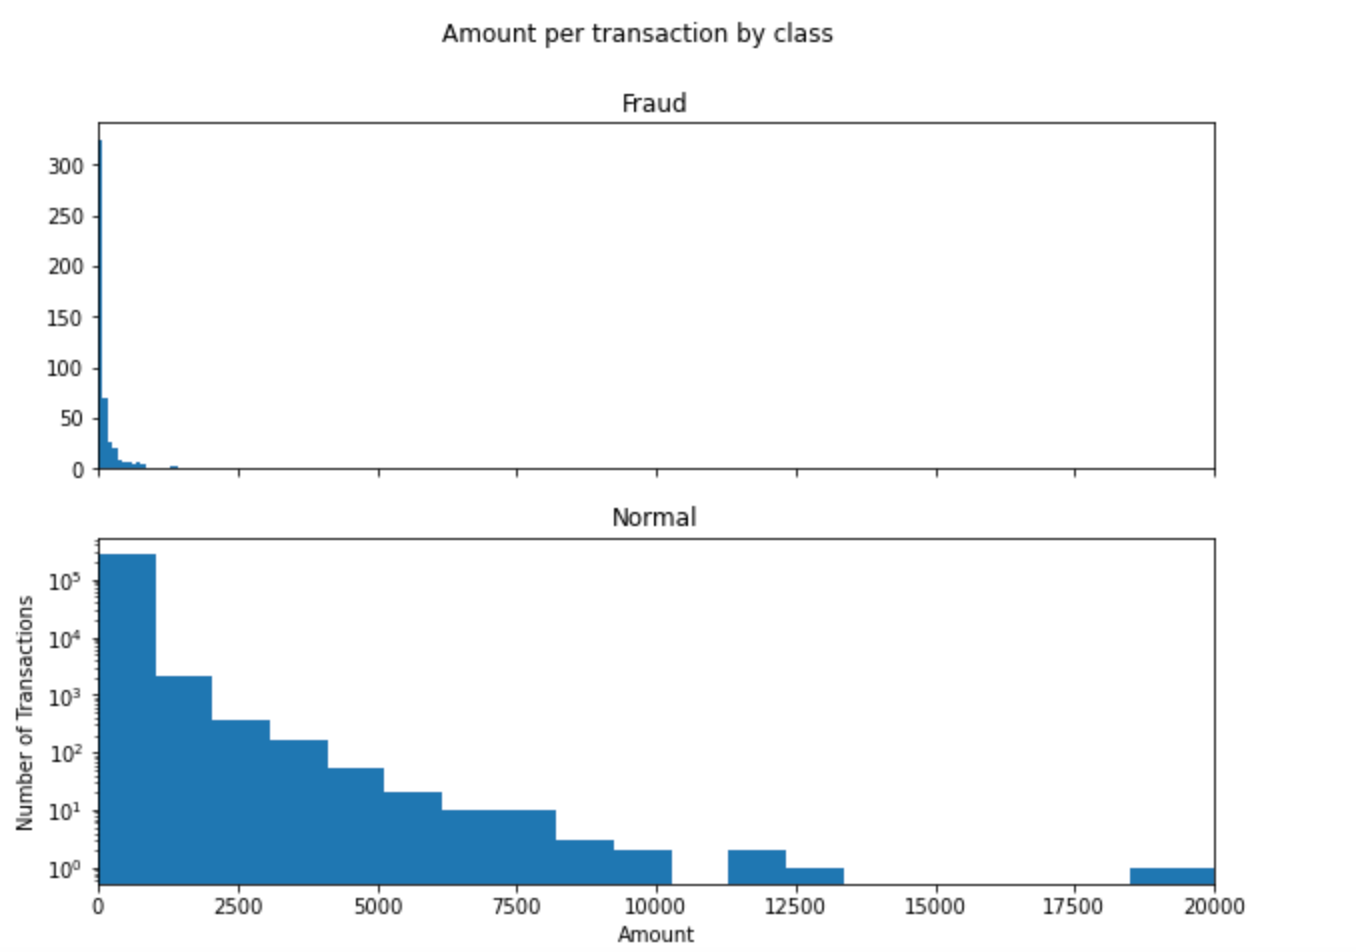

We can see that the fraudulent transctions are mostly densed in the lower range of amount, whereas the non-fraudulent transctions are spreaded throughout low to high range of amount.

### Feature correlation heatmap

Plotting a heatmap to gain a high level view of relationships amongst the features.

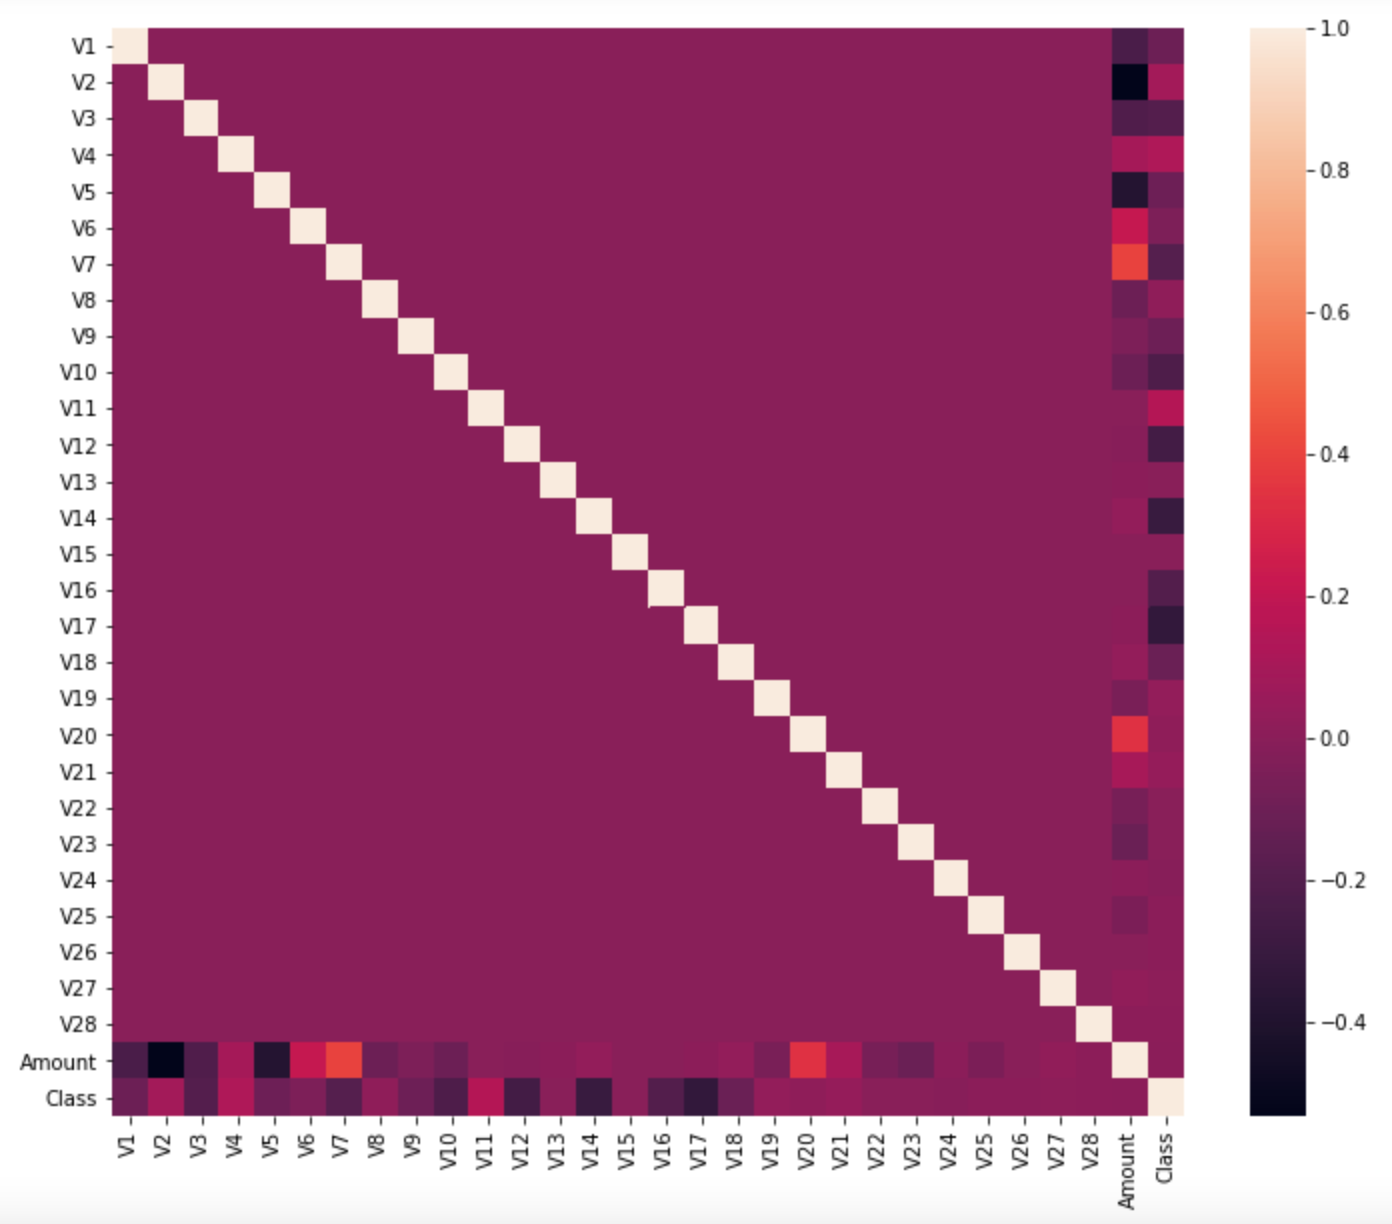

The correlation matrix shows that none of the V1 trough V28 PCA components have any correlation to each other however if we observe Class has some form positive and negative correlations with the V components but has no correlation with the Amount.

## Data Pre-processing

### Feature Scaling

We need to scale only the Amount column as all other columns are already scaled by the PCA transformation. I'll use the scikit's StandardScaler on the Amount. The scaler removes the mean and scales the values to unit variance:

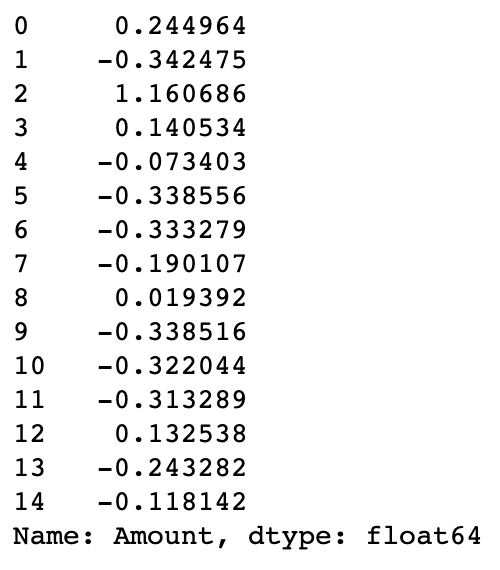

### Undersampling

We've seen in total dataset we have only 492 fraudlent records, which makes our dataset imbalanced or biased. 99% records are real transaction. Only 1% is fraud. So our data is not balanced. It may result in a model which is biased toward real transaction scenario. So we will apply undersampling and oversampling technique to overcome this conition.

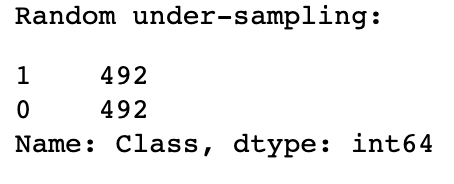

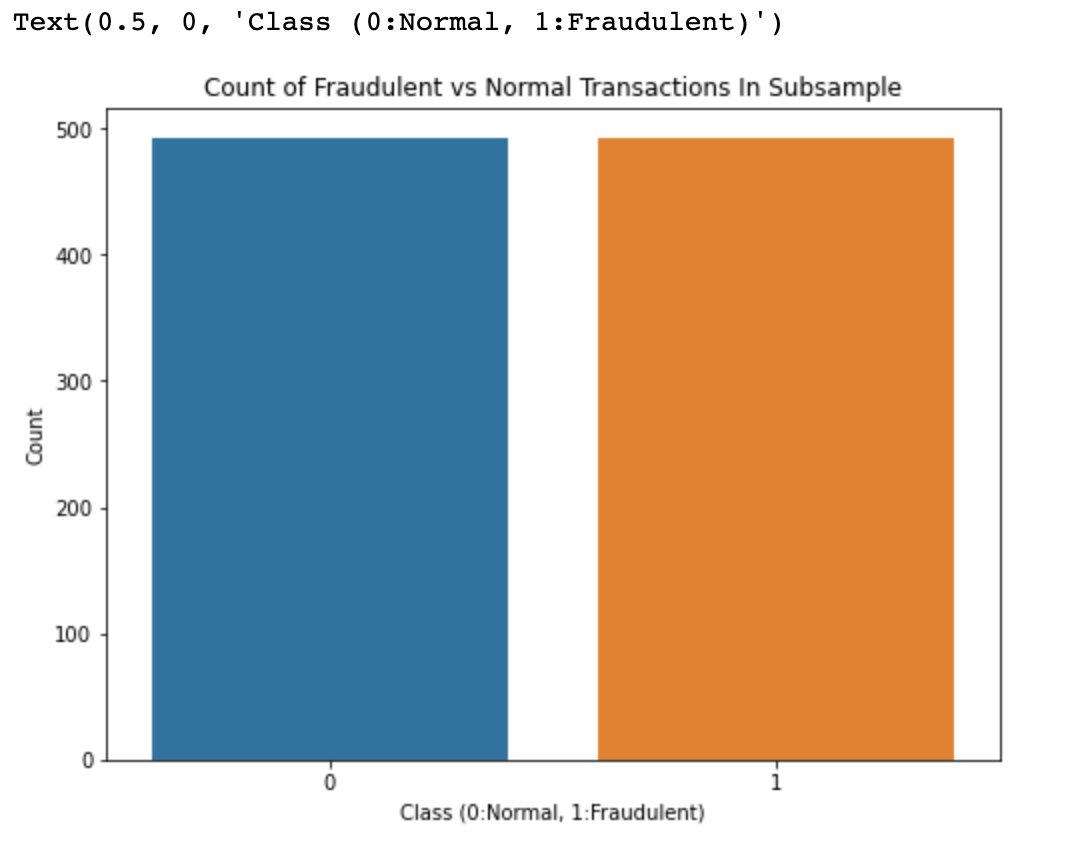

## Models Building

### 1. Artificial Neural Network (ANN)

The ANN takes a vector of length 29 as input. This represents the information related to each transactions, for instance, each line with 29 columns from the dataset. For each transaction, the final layer will output a probability distribution (sigmoid activation function) and classify either as not fraudulent (0) or fraudulent (1).

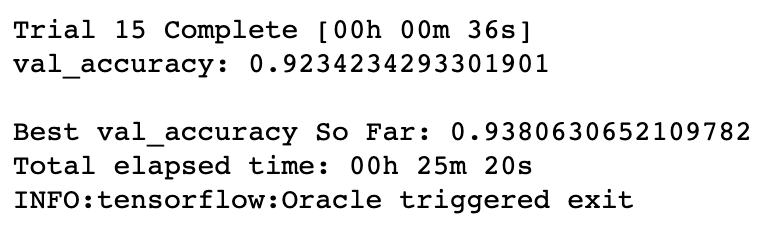

### 2. Logistic Regression

### Prediction and model evalution on the train set

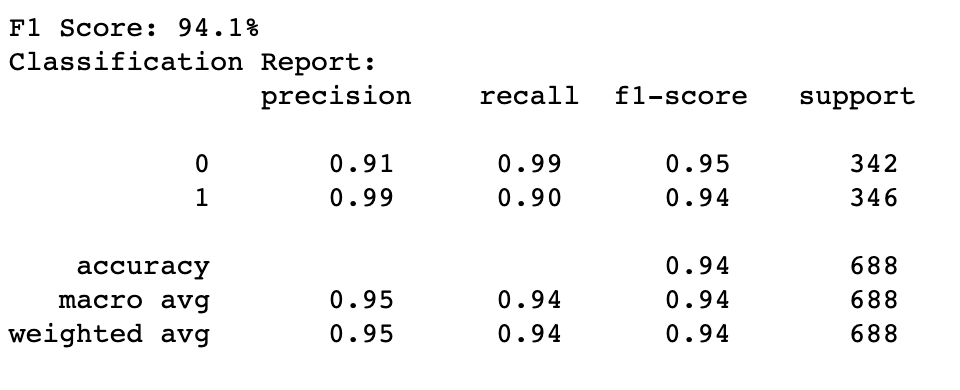

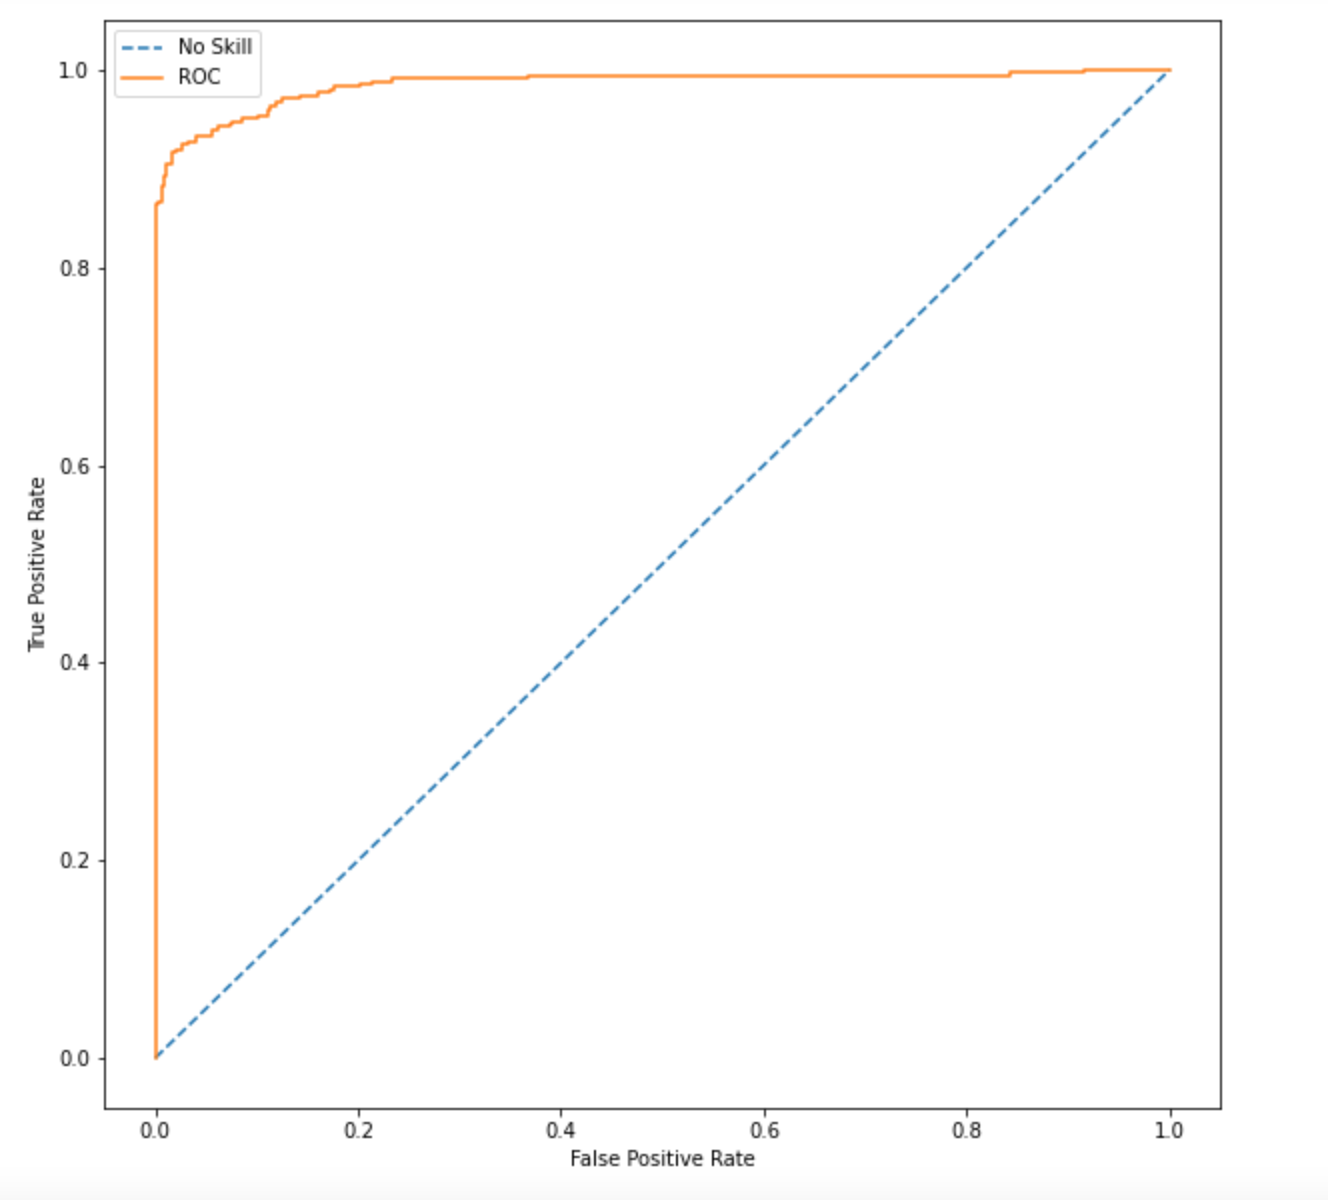

### Evaluating the model on the test set 

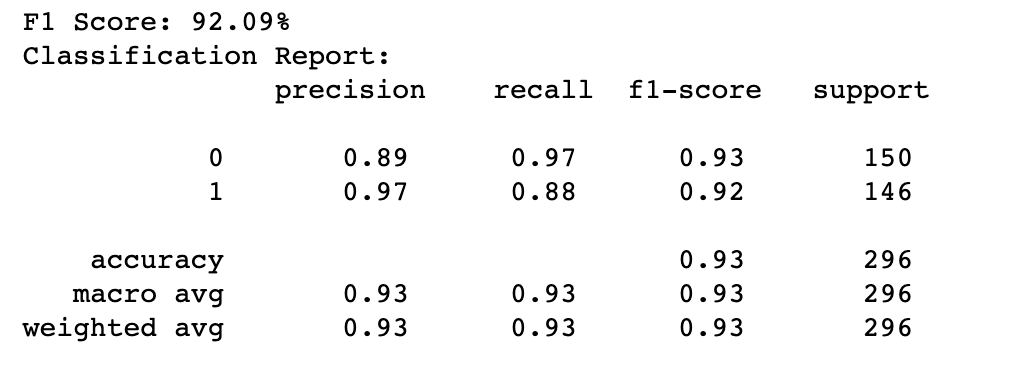

#### Confusion matrix

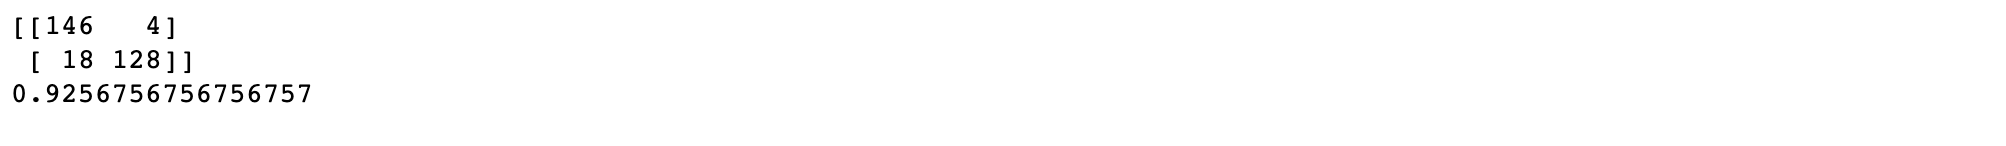

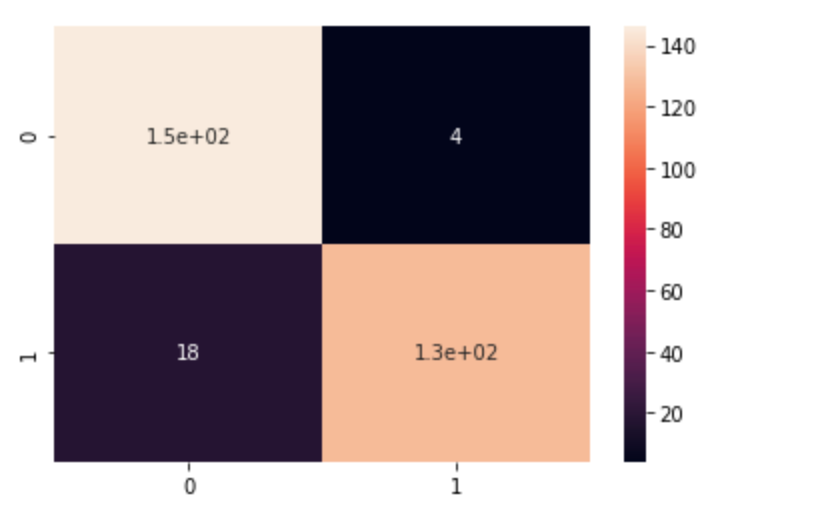

## 3. Decision Tree

### Prediction on the train set

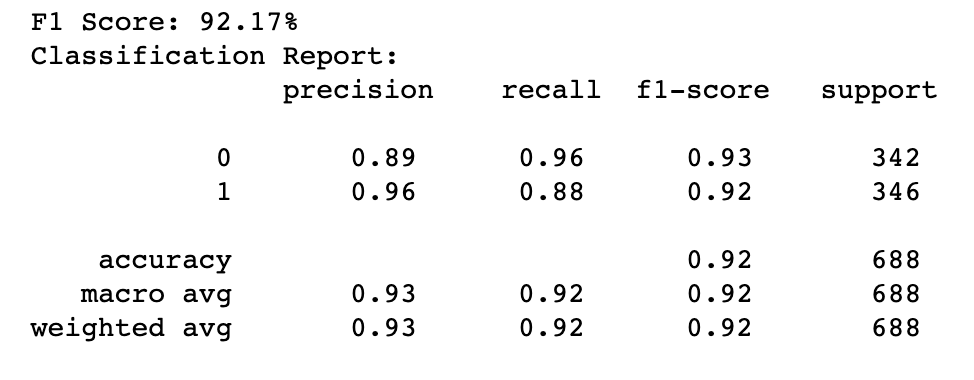

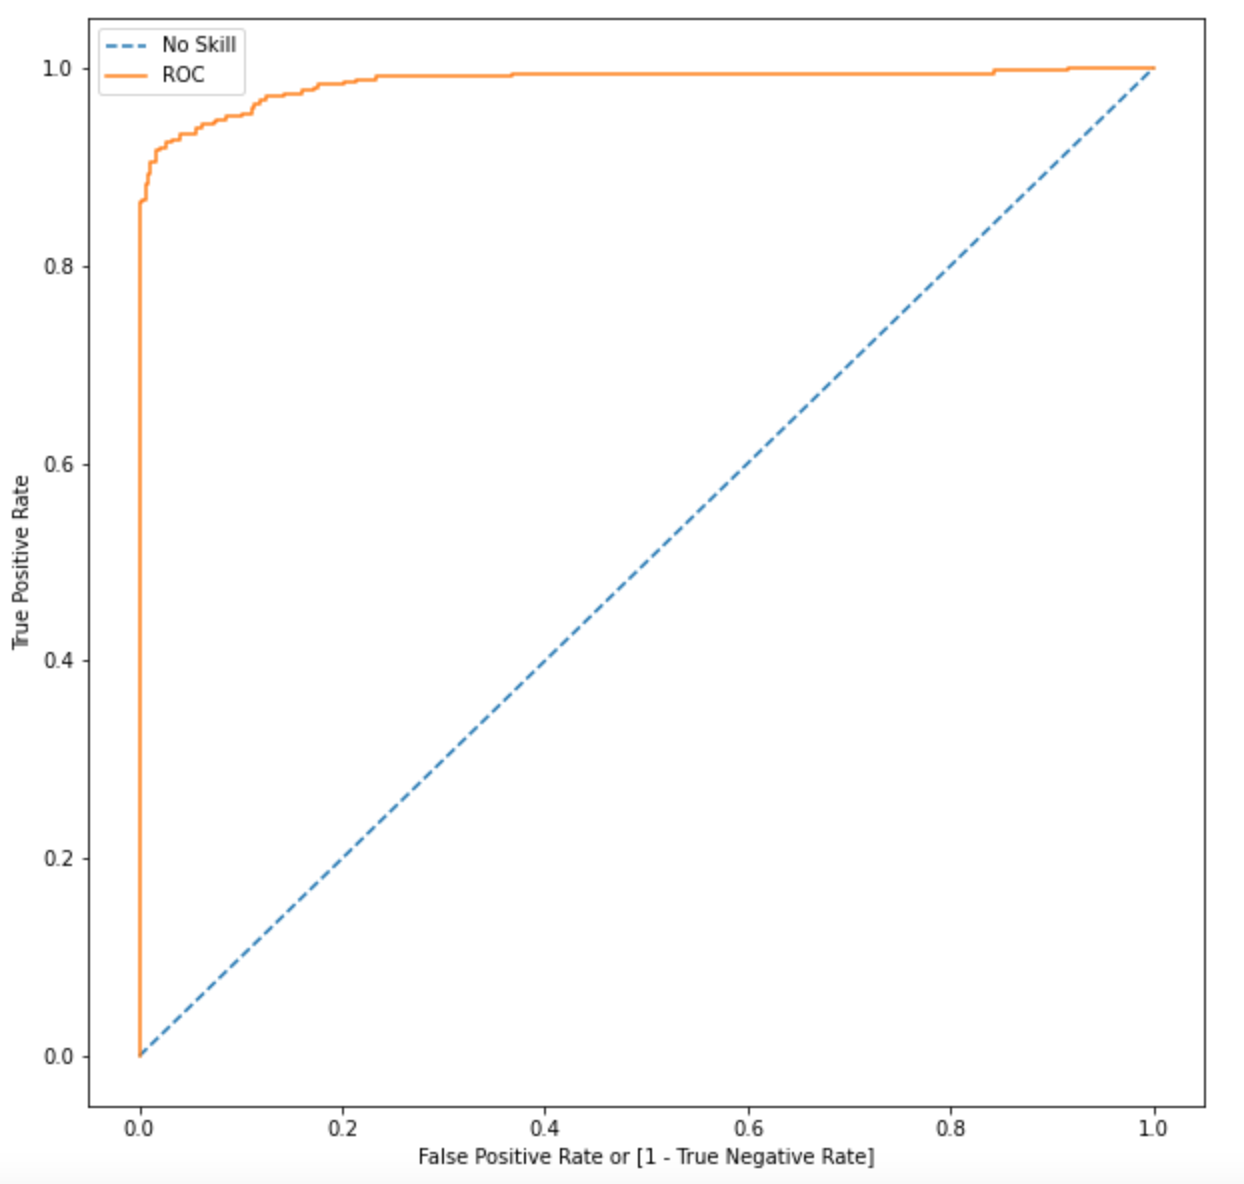

### Evaluating the model on the test set

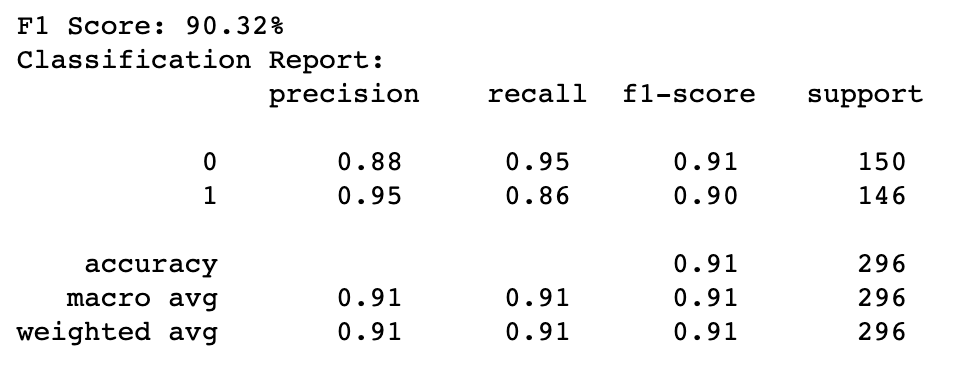

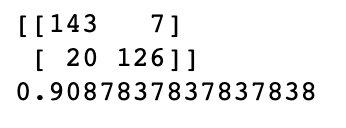

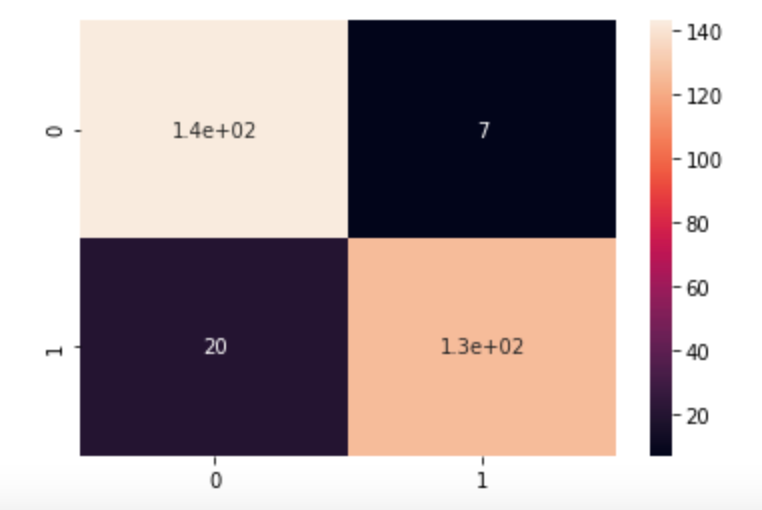

### 4. Random Forest

### Prediction and model evalution on the train set

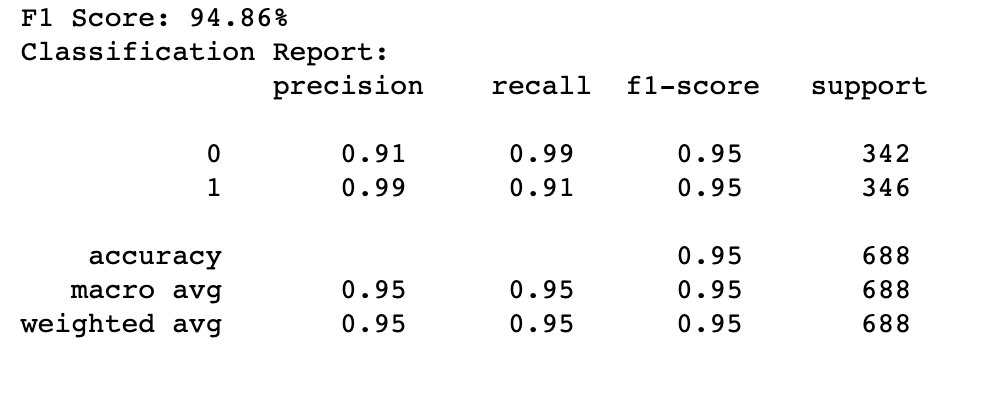

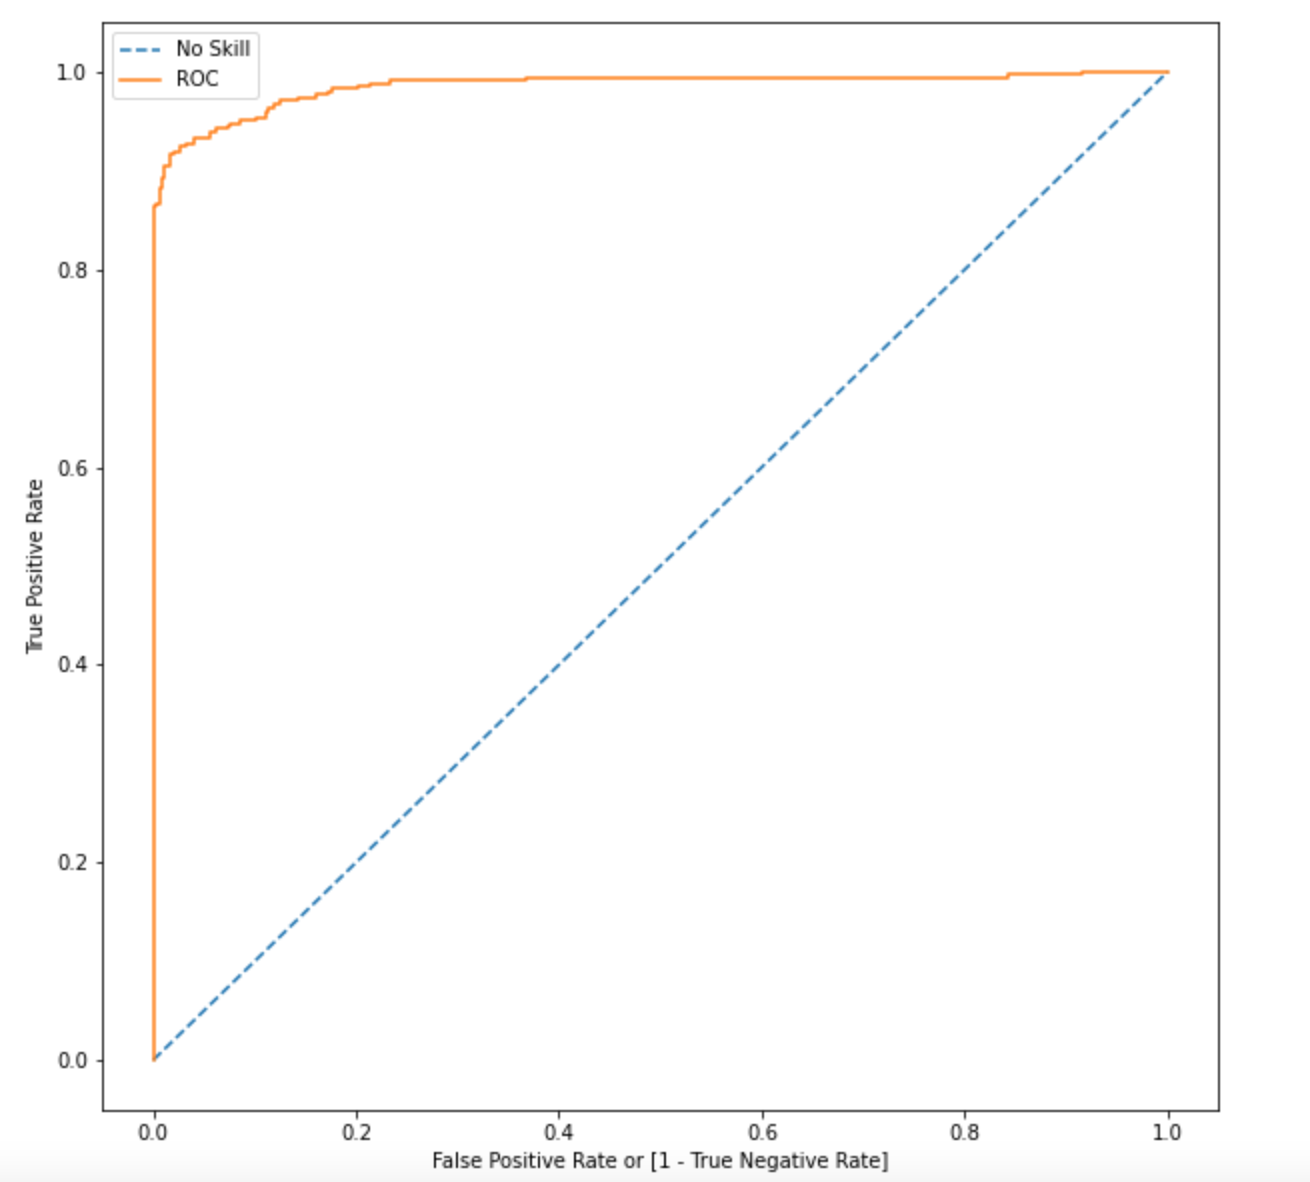

### Evaluating the model on the test set

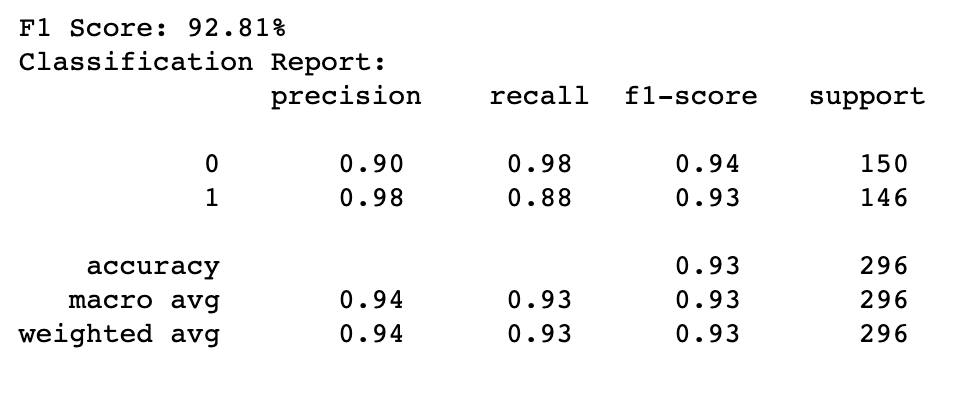

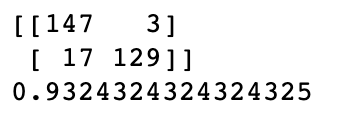

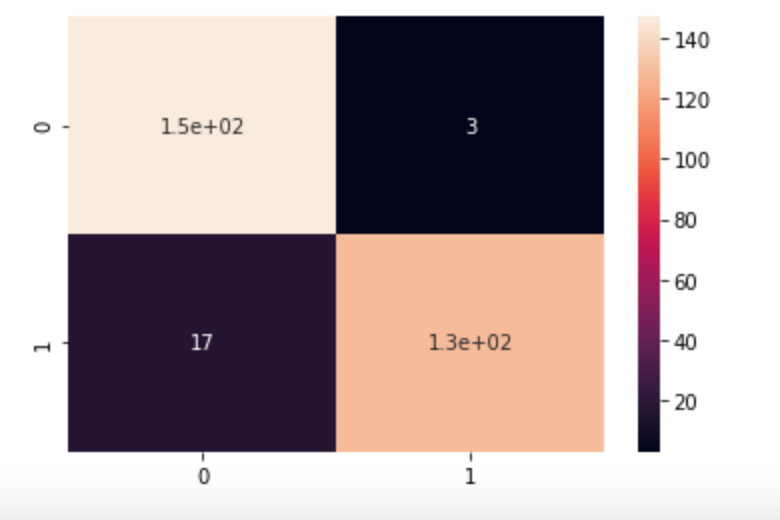

### 5. XGBoost

### Prediction and model evalution on the train set

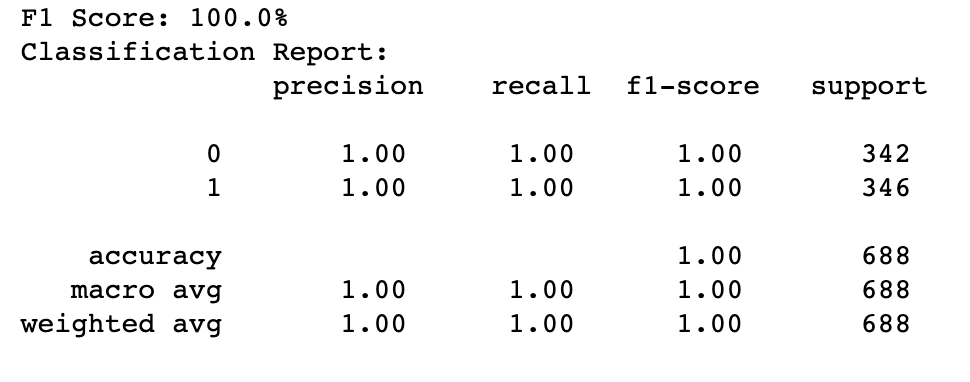

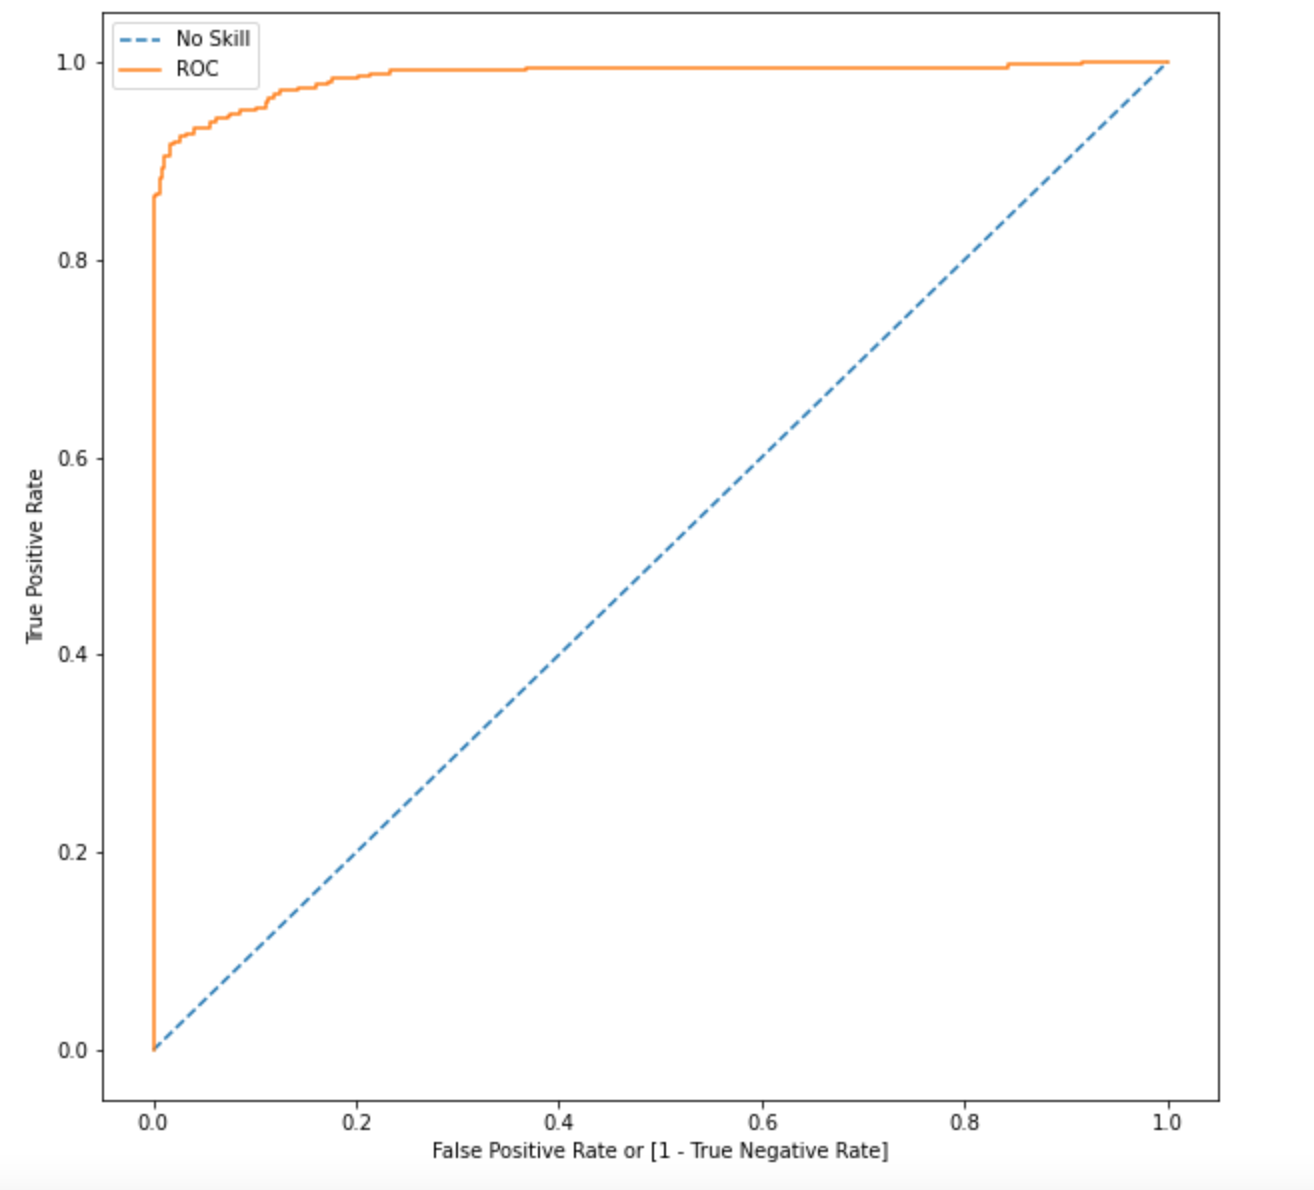

### Evaluating the model on the test set

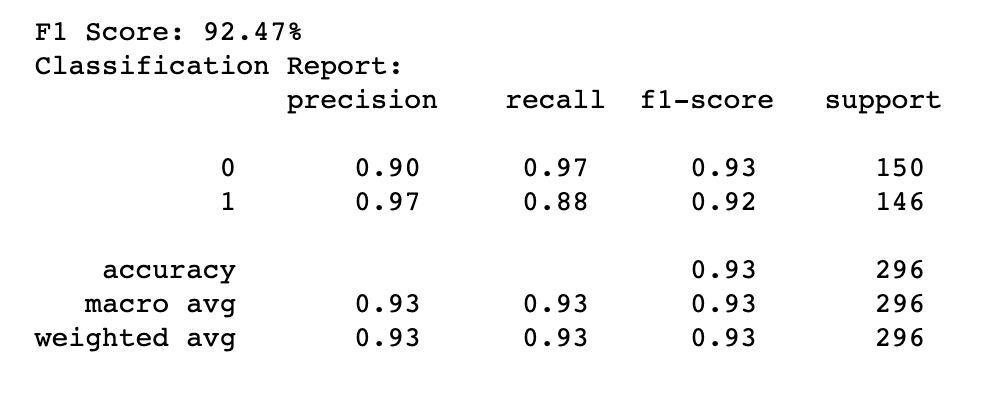

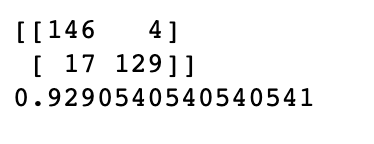

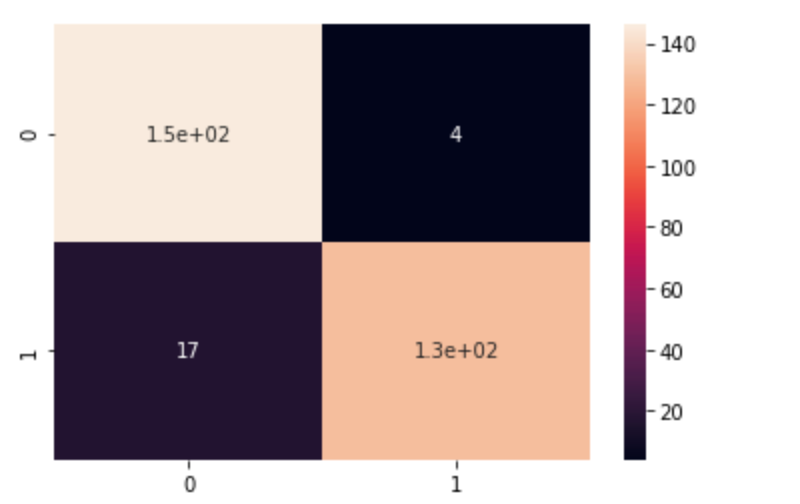

# Conclusion

We have tried several models till now. We have noticed that most of the models have performed more or less well in terms of ROC score, Recall and Precision.

While picking the best model we should consider few things such as whether we have required infrastructure, resources or computational power to run the model or not. For the models such as **Artificial Neural Network (ANN)**, **Random Forest** and **XGBoost** we require heavy computational resources and eventually to build that infrastructure the cost of deploying the model increases. On the other hand the simpler model such as **Logistic Regression** requires less computational resources, so the cost of building the model is less.

We also have to consider that for little change of the ROC score how much monetary loss of gain the bank incur. If the amount if huge then we have to consider building the complex model even though the cost of building the model is high.

After performing several models, we have seen that in the balanced dataset with Undersample technique the XGBoost model has good ROC score and also high Recall. Hence, we can go with the **XGBoost** model here. It is also easier to interpret and explain to the business.